Uncover the factors that lead to employee attrition and explore important questions such as:
1. Show me a breakdown of distance from home by job role and attrition.
2. Compare average monthly income by education and attrition.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df['Education'].nunique()

5

1. Show me a breakdown of distance from home by job role and attrition.

In [7]:
df.MonthlyIncome.nunique()

1349

In [8]:
df.groupby(['DistanceFromHome', 'JobRole', 'Attrition'])['Attrition'].count().unstack().reset_index()

Attrition,DistanceFromHome,JobRole,No,Yes
0,1,Healthcare Representative,23.0,NaN
1,1,Human Resources,8.0,1.0
2,1,Laboratory Technician,27.0,4.0
3,1,Manager,13.0,NaN
4,1,Manufacturing Director,23.0,1.0
...,...,...,...,...
219,29,Manager,3.0,1.0
220,29,Manufacturing Director,4.0,NaN
221,29,Research Scientist,3.0,1.0
222,29,Sales Executive,4.0,1.0


<AxesSubplot:xlabel='JobRole', ylabel='DistanceFromHome'>

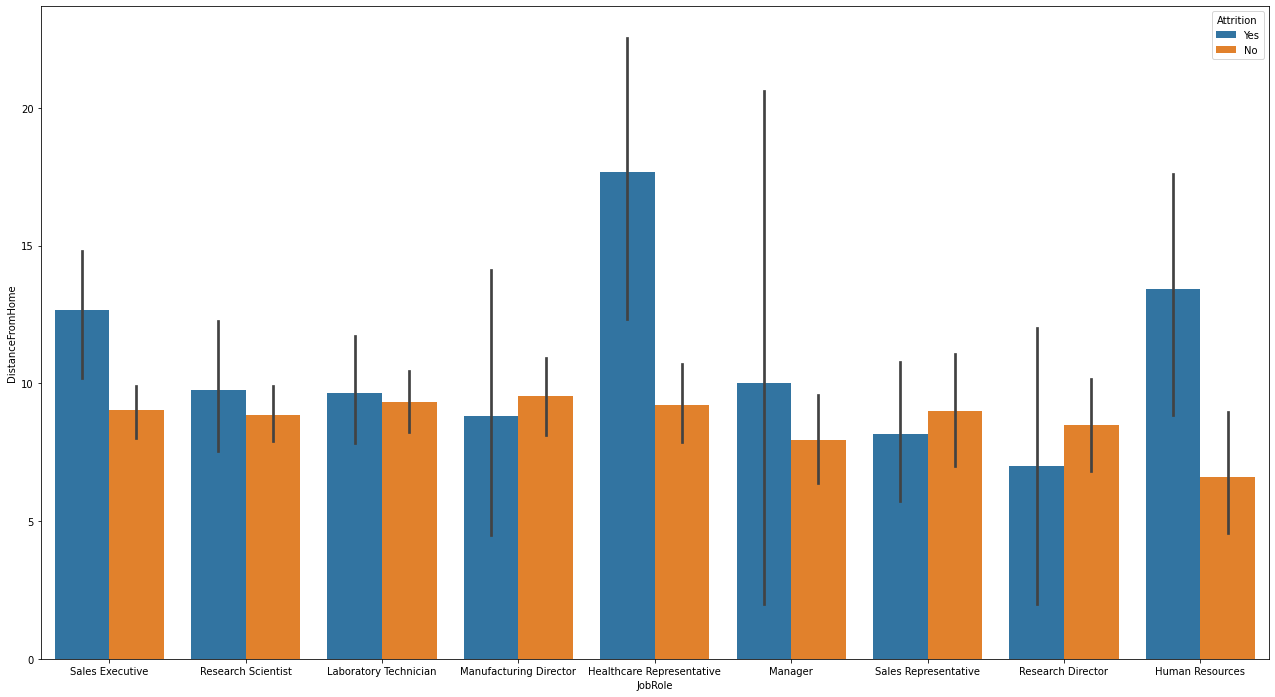

In [9]:
#plt.gcf().set_size_inches(22, 12, forward=True)
plt.figure(figsize = (22, 12))
sns.barplot(x = 'JobRole', y = 'DistanceFromHome', data = df, hue = 'Attrition')

Alternatively, using the dummy endoding technique within the pandas library:

In [10]:
df_dummies = pd.get_dummies(df[['DistanceFromHome', 'JobRole', 'Attrition']], columns = ['Attrition'])
df_dummies.groupby(['DistanceFromHome', 'JobRole']).count()

Attrition_No  Attrition_Yes
DistanceFromHome JobRole                                               
1                Healthcare Representative            23             23
                 Human Resources                       9              9
                 Laboratory Technician                31             31
                 Manager                              13             13
                 Manufacturing Director               24             24
...                                                  ...            ...
29               Manager                               4              4
                 Manufacturing Director                4              4
                 Research Scientist                    4              4
                 Sales Executive                       5              5
                 Sales Representative                  1              1

[224 rows x 2 columns]

2. Compare average monthly income by education and attrition.

In [11]:
df.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean()

Education  Attrition
1          No           5926.129496
           Yes          4360.161290
2          No           6586.058824
           Yes          4282.545455
3          No           6882.919662
           Yes          4770.242424
4          No           7087.814706
           Yes          5335.155172
5          No           8559.906977
           Yes          5850.200000
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

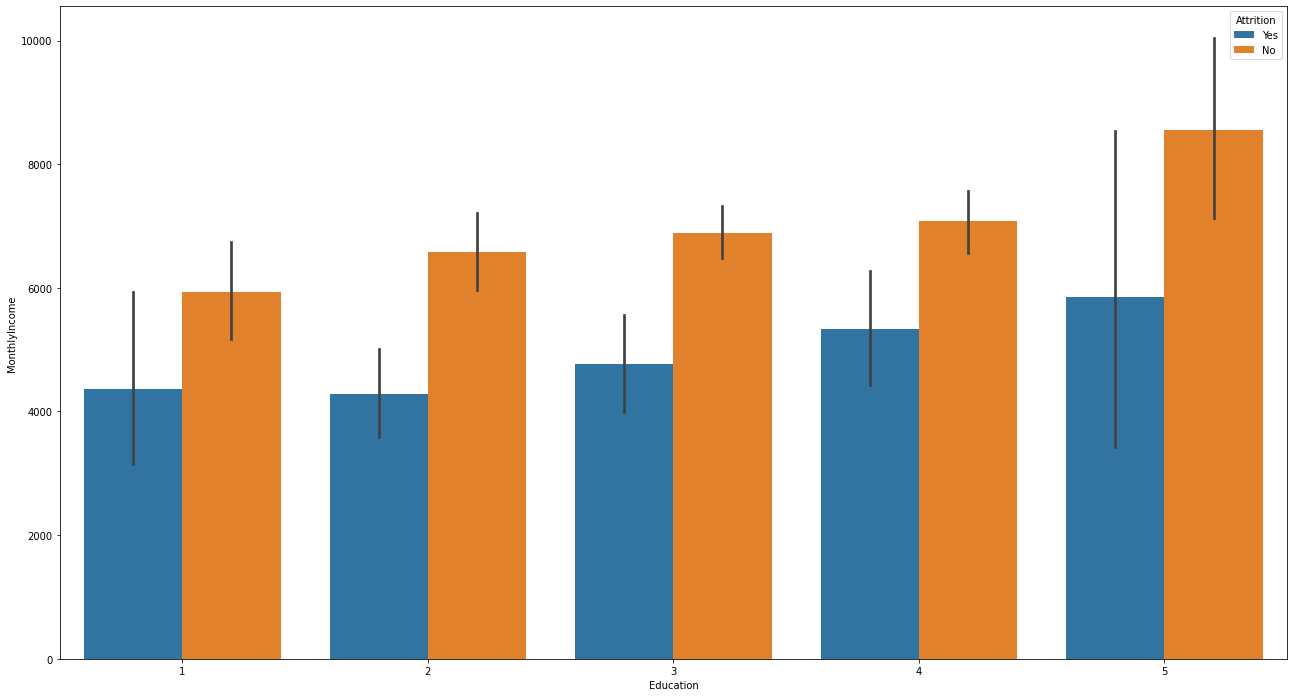

In [12]:
plt.figure(figsize = (22, 12))
sns.barplot(x = 'Education', y = 'MonthlyIncome', data = df, hue = 'Attrition')